# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


#### Linear Regression
A Linear Regression model can be to find a relationship between one or more features(independent variables) and a 
continuous target variable(dependent variable). The model is trained by minimizing the the residual sum of squares
around the best-fit line of data and can be better refined using gradient descent to minimize the cost function. 

#### Polynomial Regression
Polynomial Regression is used when data is more random and complicated to be captured by a Linear Regression model. 
The model can also reduce the occurrence of overfitting and underfitting during the process of training the data. The 
method of training of using the RSS equation is similar to the Linear Regression model.

#### Overfitting vs Underfitting
Overfitting occurs when the patterns of the training set is learned so well by the model that it no longer predicts 
correct outputs for the validation set. Parameters are not generalized enough for the model to make predictions on 
more randomized data. Underfitting occurs the model does not learn the patterns to the problem well enough. Therefore, 
it performs poorly on both the training set and the validation set.

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

Logistic Regression measures the relationship between the categorical dependent variable and one or more independent 
variables by estimating probabilities using a sigmoid function.

Support Vector Machine (SVM) is a supervised machine learning algorithm and is often used for classification problems.
Each data item is plotted as a point in n-dimensional space where n is number of features, along with the value of 
each feature being the value of a particular coordinate. Classification is then performed by finding the hyper-plane 
that differentiates the two classes. When the data distribution is linearly separable, we define support vectors to be 
the decision boundary, and the distances between nearest data point (either class) and hyper-plane is called margins. 
When the data distribution is not linearly separable, we use slack variables to measure the ratio of its distance from 
a marginal hyperplane to the magnitude of its normal vector of the hyperplane. In SVM, it is easy to have a linear 
hyperplane between these two classes. SVM introduces a technique of using kernels to convert not separable problem to 
separable problem. Kenels are functions which take low dimensional input space and transform it to a higher 
dimensional space.

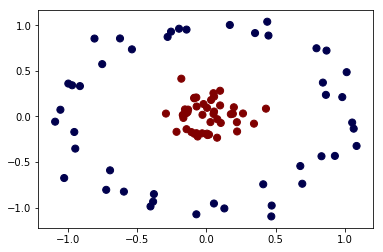

In [5]:
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(90, factor=0.2, noise=0.1) 
#noise = standard deviation of Gaussian noise added in data. 
#factor = scale factor between the two circles
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='seismic')
plt.show()

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

#### Supervised vs Unsupervised Learning
Supervised learning trains a model using a labelled dataset, and the training process involves validating a learned function to achieve the best model. Whereas unsupervised learning involves unlabelled dataset. During the training, the model finds patterns by itself.

#### K-NN Algorithm
K-NN is called a lazy learning algorithm because it does less work in the training phase and more work in the testing phase to make a classification. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples. We start by choosing a proper value for k, the number of nearest neighbors. Then for each example in the data, calculate the distance between the example and the current example from the data, and add the distance and the index of the example to an ordered collection. After, we sort the ordered collection of distances and indices from smallest to largest by the distances and pick the first k entries from the sorted collection. Read the labels of selected entries, if regression, return the mean of the k labels, if classification, return the mode of the k labels. 

In [11]:
# Example of implementing the K-NN algorithm

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.3) # 70% training and 30% test

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print("Predicted model accuracy:",metrics.accuracy_score(y_test, y_pred))

Predicted model accuracy: 0.7962962962962963


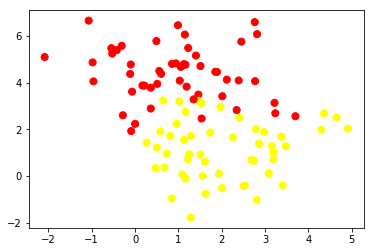

In [16]:
# Example where SVM works and not K-NN

from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

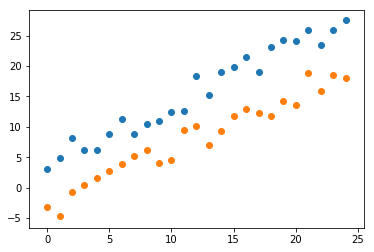

In [12]:
# Example where K-NN works and not SVM

x = [val for val in range(25)]

y1 = [(val + 4 + np.random.uniform(-2.5,2.5)) for val in x]

y2 = [(val - 4 + np.random.uniform(-2.5,2.5)) for val in x]

plt.scatter(x, y1)
plt.scatter(x, y2)
plt.show()

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [11]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()

## YOUR CODE HERE

# step 1: defining a function which calculates euclidean distance between two data points
def distance(data1, data2, length):
    d = 0
    for x in range(length):
        d += np.square(data1[x] - data2[x])
    return np.sqrt(d)

# step 2: defining our KNN model
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]

    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
 
    neighbors = []

    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
        
    classVotes = {}
    
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1

    sortedVotes = sorted(classVotes.items(), key = operator.itemgetter(1), reverse = True)
    return(sortedVotes[0][0], neighbors)

### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

#### Bagging
Bagging refers to the idea of creating several subsets of data from training sample chosen randomly with replacement, 
and each subset data is used to train their decision trees. This method gives us a result by taking the average of all 
predictions, which is more robust than a single decision tree. Bagging is used when the goal is to reduce the variance
of a decision tree.

#### Boosting
Boosting is to solve for net error from the prior tree by creating a collection of predictors and fitting consecutive 
trees(random sample) at every step. It is used when different loss functions are present and works well with 
interactions.

#### Decision Tree
Decision trees are often used to model classification and regression by answering sequential "questions" which send 
data down a certain route.

Pros:
    Fast when rendering data
    Perform well on large datasets
    Easy to interpret and make for straightforward visualizations 
Cons:
    Prone to overfitting
    The result at a given step does not ensure a route that will lead to the optimal decision at the final node of the tree

#### Random Forest    
Random forest is a collection of random trees. It extends the idea of bagging and takes random features rather than 
using all features to grow trees.

Pros:
    Handles missing values and maintains accuracy for missing data.
    Handles data of higher dimensionality very well.
Cons:
    Will not give precise values for the regression model.

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

#### PCA
Principal Component Analysis(PCA) uses the variance of each feature to find new features in order to maximize its separability. It uses high-dimensional and correlated data to transform the original space of features into the space of principal components. In order to perform dimensionality reduction, first reduce the number of features to be used in the final model by focusing only on the components accounting for the majority of the variance in the dataset(the number of the features in the transformed subspace can be found by cross-validation.), and then remove the correlation between features, calculating the covariance matrix of every feature. The eigenvectors and eigenvalues of the covariance matrix give us the directions in the feature space that maximize data variance. Once the data is projected on this subspace, the eigenvectors are the axes of the transformed feature space. We subtract the mean to obtain an equation to compute the covariance matrix.

#### Autoencoder
Autoencoders can have nonlinear enoder or decoders, whereas PCA is restricted to a linear map. Autoencoders have advantages such as the training with one dense encoder layer and one dense decoder layer and linear activation is essentially equivalent to performing PCA and learning non-linear transformations, unlike PCA, with a non-linear activation function and multiple layers. Also, an autoencoder doesn’t have to learn dense layers; it can use convolutional layers to learn too. It may be more efficient, in terms of model parameters, to learn several layers with an autoencoder rather than learn one huge transformation with PCA. It gives a representation as the output of each layer, and maybe having multiple representations of different dimensions is useful. The reduced dimension of an encoder is equivalent to that of a PCA when the 

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [3]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


SVM accuracy with PCA is: 0.4108527131782946


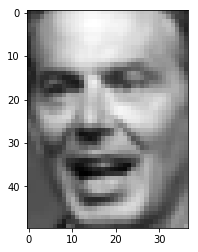

In [8]:
import matplotlib.pyplot as plt

# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

### insert your code here ###
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
pca.fit(X)

X_pca = pca.transform(X)
 
x_train_pca = X_pca[:1030]
y_train_pca = y[:1030]

x_test_pca = X_pca[1030:]
y_test_pca = y[1030:]
 
model_svc = SVC(gamma = 0.001)
model_svc.fit(x_train_pca, y_train_pca)

y_pred_pca = model_svc.predict(x_test_pca)
print('SVM accuracy with PCA is: {}'.format(accuracy_score(y_test_pca, y_pred_pca)))

## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

